In [2]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

Text(0, 0.5, 'Wing Length (cm)')

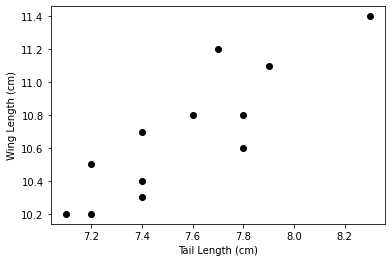

In [3]:
wing_length = [10.4, 10.8, 11.1, 10.2, 10.3, 10.2, 10.7, 10.5, 10.8, 11.2, 10.6, 11.4]
tail_length = [7.4, 7.6, 7.9, 7.2 ,7.4, 7.1, 7.4, 7.2, 7.8, 7.7, 7.8, 8.3]

plt.plot(tail_length, wing_length, 'ko')
plt.xlabel('Tail Length (cm)')
plt.ylabel('Wing Length (cm)')

In [4]:
n             = np.size(wing_length)
sample_mean_x = np.sum(wing_length)/n
sample_mean_y = np.sum(tail_length)/n
SSEX          = np.sum((wing_length - sample_mean_x) ** 2)
SSEY          = np.sum((tail_length - sample_mean_y) ** 2)
SCOVXY        = np.sum((wing_length - sample_mean_x)*(tail_length - sample_mean_y))
rXY           = SCOVXY/(np.sqrt(SSEX)*np.sqrt(SSEY))
rYX           = SCOVXY/(np.sqrt(SSEY)*np.sqrt(SSEX))

r_builtin = np.corrcoef(wing_length, tail_length)

print(f'rXY={rXY:.4f} (computed), {r_builtin[0,1]:.4f} (built-in)')
print(f'rYX={rYX:.4f} (computed), {r_builtin[1,0]:.4f} (built-in)')

rXY=0.8704 (computed), 0.8704 (built-in)
rYX=0.8704 (computed), 0.8704 (built-in)


In [5]:
standard_error_r = np.sqrt((1-rXY**2)/(n-2))

z = 0.5*np.log((1+rXY)/(1-rXY))

z_std = np.sqrt(1/(n-3))

scale = st.norm.ppf(0.025)*z_std
z_95CIs = np.array([z+scale, z-scale])

CI95 = (np.exp(2*z_95CIs)-1)/(np.exp(2*z_95CIs)+1)
print(f'r={rXY:.2f}, sem={standard_error_r:.4f}, 95 pct CI = [{CI95[0]:.4f}, {CI95[1]:.4f}]')

r=0.87, sem=0.1557, 95 pct CI = [0.5923, 0.9632]


In [7]:
t_val = rXY/standard_error_r
prob = 2*(1-st.t.cdf(t_val,n-2))

print(f'p={prob:.4f} for H0: r=0')

p=0.0002 for H0: r=0


In [8]:
z_Yale = 0.5*np.log((1+0.75)/(1-0.75))

plambda = (z-z_Yale)/z_std

prob2 = 2*(1-st.norm.cdf(plambda))
print(f'p={prob2:.4f} for H0: r=0.75')

p=0.2780 for H0: r=0.75


In [9]:
r_ref   = 0.5;  
z_ref   = 0.5*np.log((1+r_ref)/(1-r_ref))
plambda = (z-z_ref)/np.sqrt(1/(n-3))

alpha = 0.05
z_criterion = st.norm.ppf(1-alpha/2)

power = 1-st.norm.cdf(z_criterion-plambda)

desired_power = 0.99
predicted_n = np.ceil(1/((z-z_ref) / (z_criterion - st.norm.ppf(1-desired_power)))**2+3)

print(f'power = {power:.4f}, predicted n = {int(predicted_n)}')

power = 0.6539, predicted n = 33
